# 문제 1
- https://leetcode.com/contest/weekly-contest-325/problems/shortest-distance-to-target-string-in-a-circular-array/

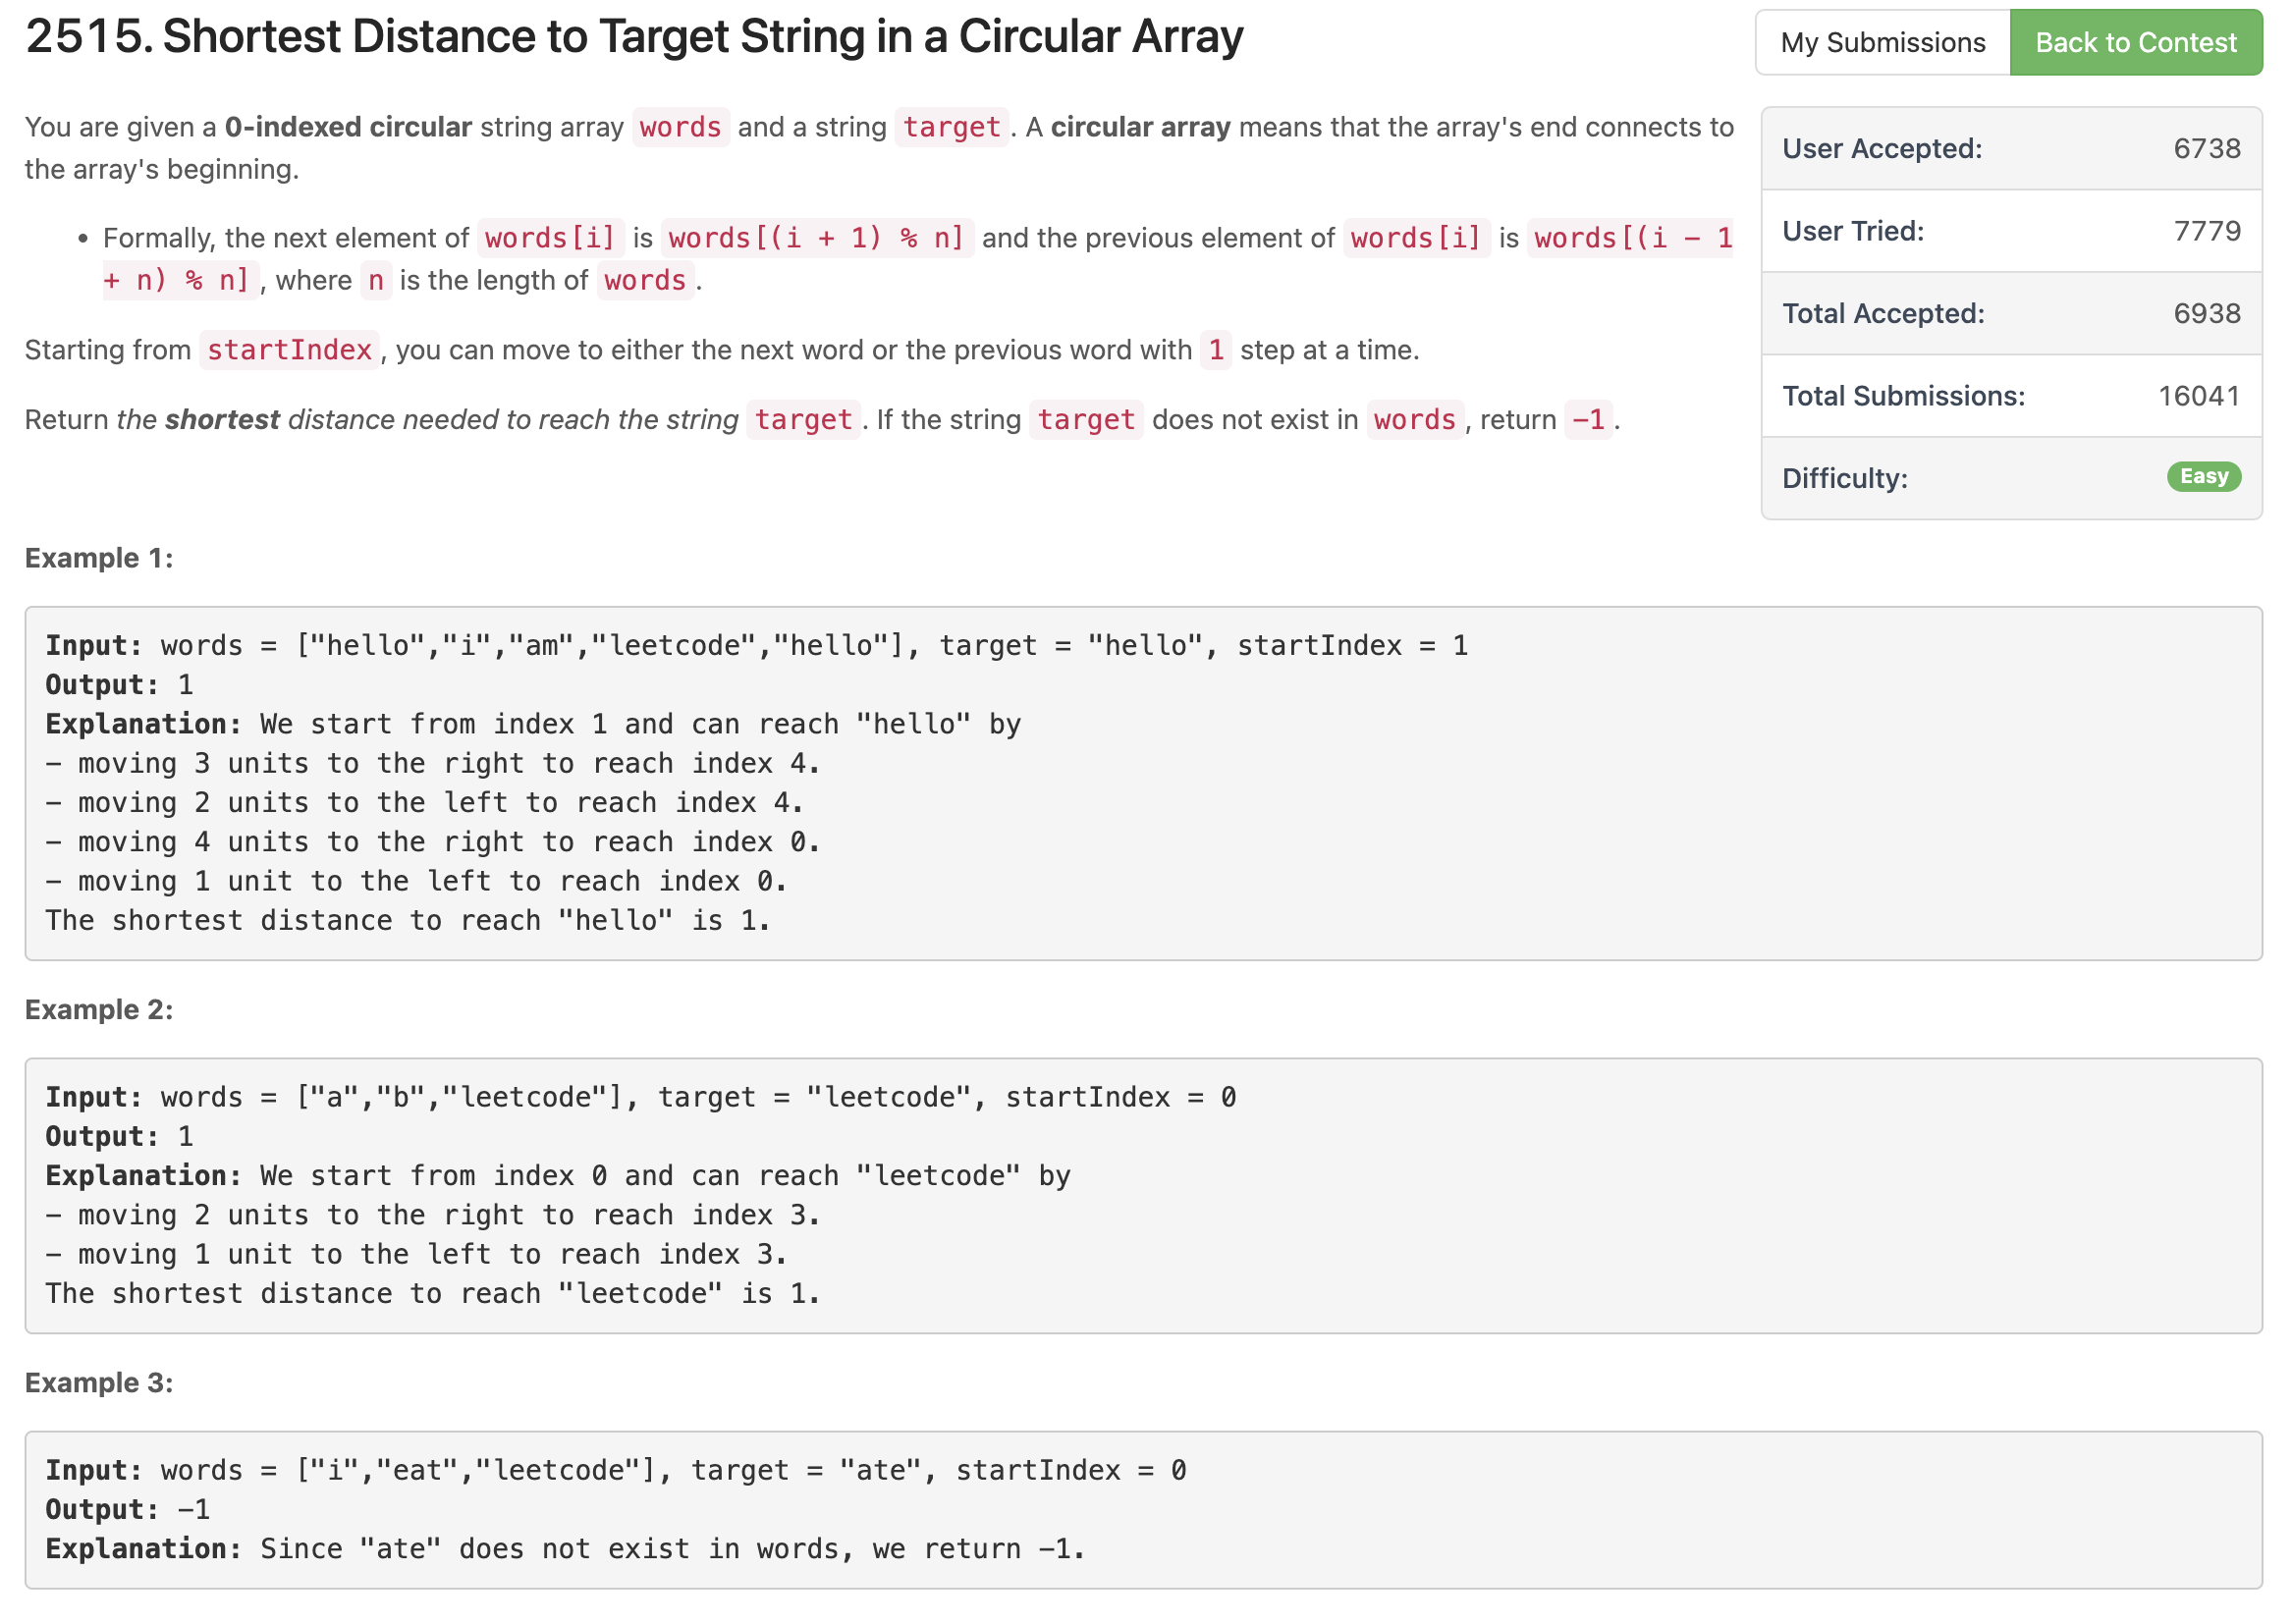
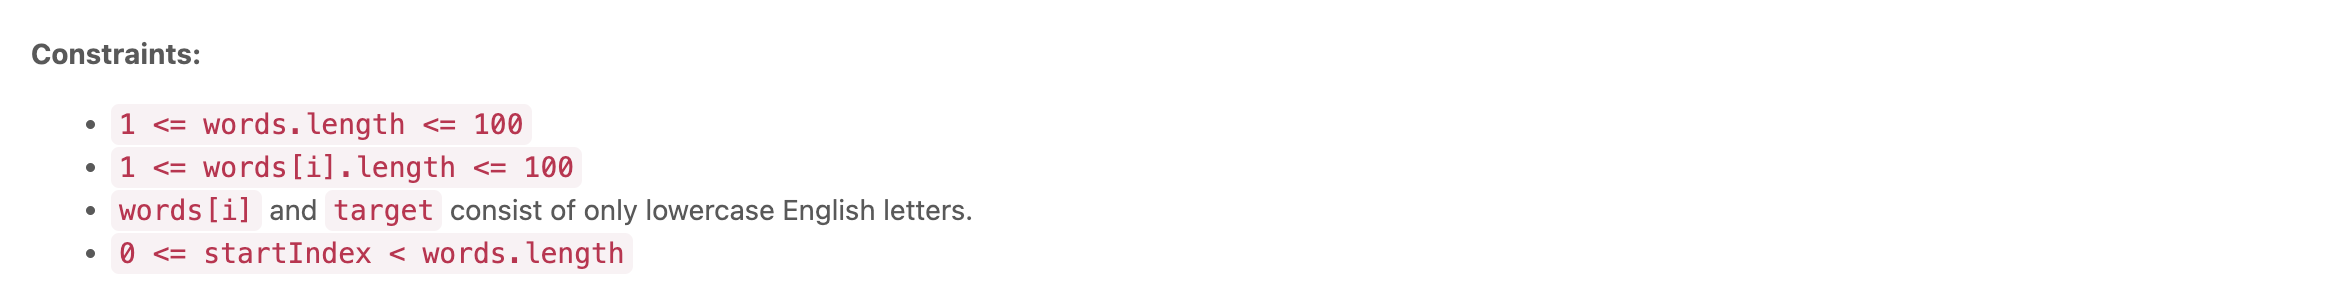

In [1]:
from collections import deque

class Solution:
    def closetTarget(self, words: List[str], target: str, startIndex: int) -> int:
        if target not in words:
            return -1
        else:
            target_idx = []
            for i,word in enumerate(words):
                if word == target:
                    target_idx.append(i)

            n = len(words)
            answer = n
            for idx in target_idx:
                min_dist = min(abs(idx-startIndex), abs(startIndex+n-idx), abs(idx+n-startIndex))
                if min_dist < answer:
                    answer = min_dist

            return answer

# [0,1,2,3,4,5] : 6
# 1 -> 5
# 1) 4 (right) : 5-1
# 2) 2 (left) : 1+6-5

# [0,1,2,3,4,5,6,7,8,9]
# 8 -> 2
# 1) 6 (left) : 8-2
# 2) 4 (right) : abs(2+10-8)


NameError: name 'List' is not defined

# 문제 2
- https://leetcode.com/contest/weekly-contest-325/problems/take-k-of-each-character-from-left-and-right/

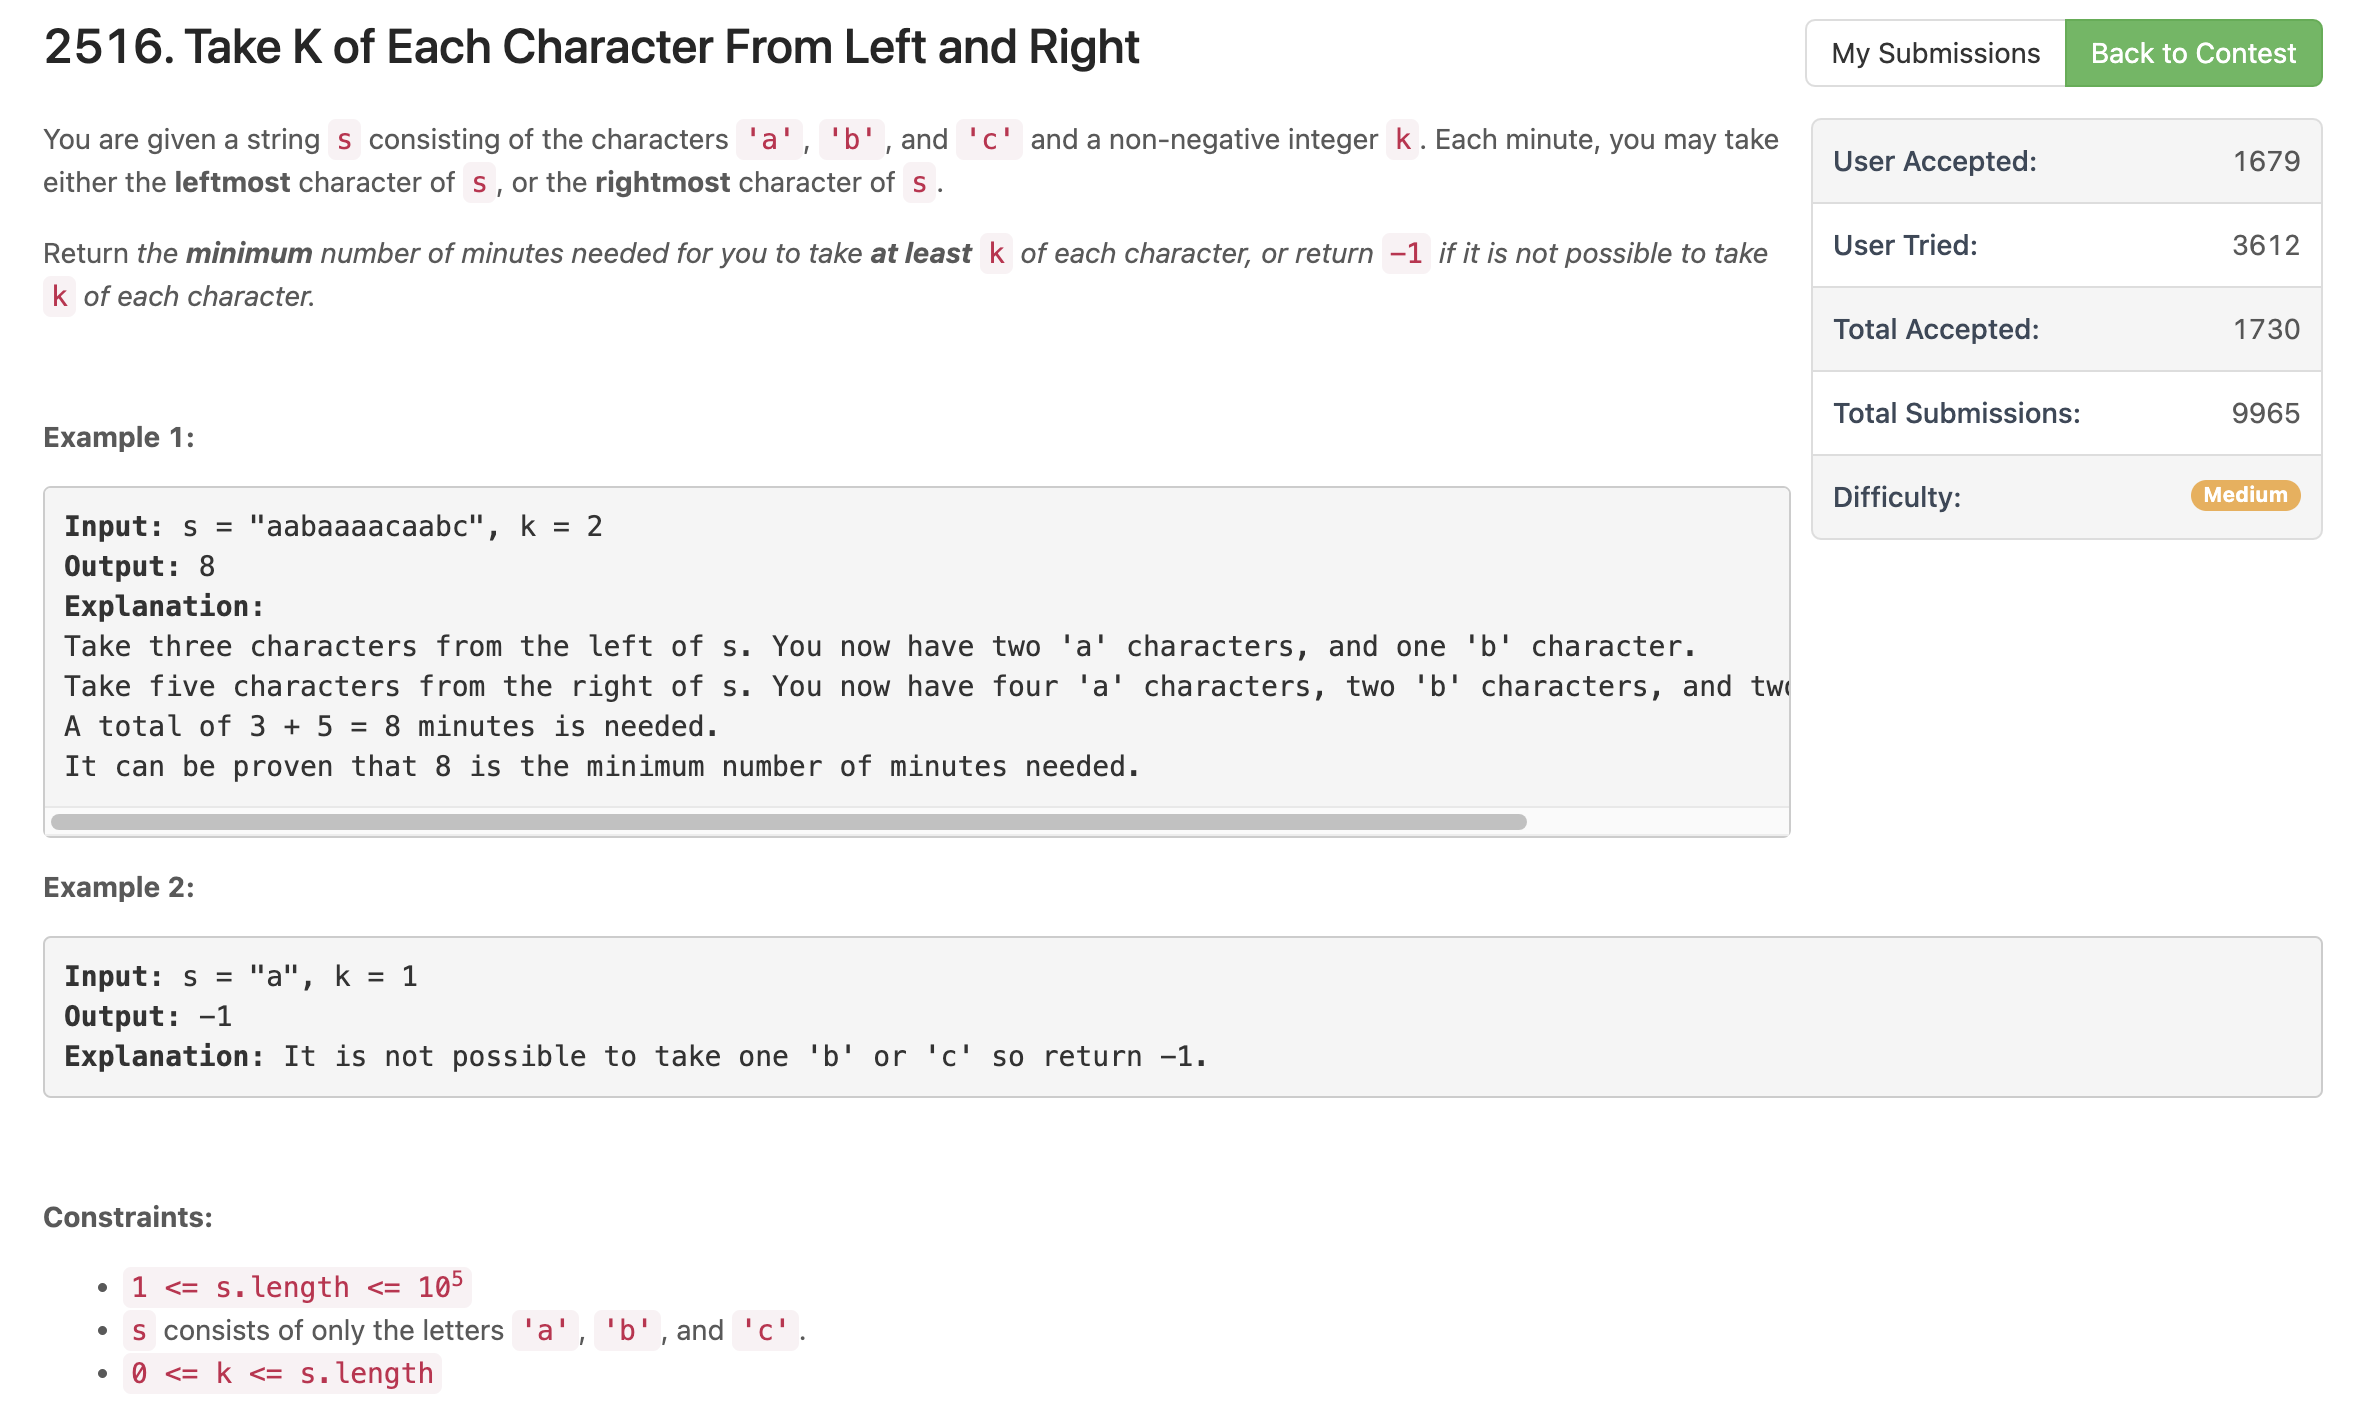

- 참고한 풀이
- sliding window

In [ ]:
class Solution:
    def takeCharacters(self, s: str, k: int) -> int:
        # create count dic
        count = collections.Counter(s)
        
        # any char is not enough
        if count['a'] < k or count['b'] < k or count['c'] < k:
            return -1
        
        # sliding window
        res = len(s)
        l = 0
        for r in range(len(s)):
            # update count
            count[s[r]] -= 1
            # if freq not enough for the remaining string
            while l <= r and (count['a'] < k or count['b'] < k or count['c'] < k):
                count[s[l]] += 1
                l += 1
            # update valid res
            res = min(res, count['a'] + count['b'] + count['c'])
        return res
            

# 문제 3
- https://leetcode.com/contest/weekly-contest-325/problems/maximum-tastiness-of-candy-basket/

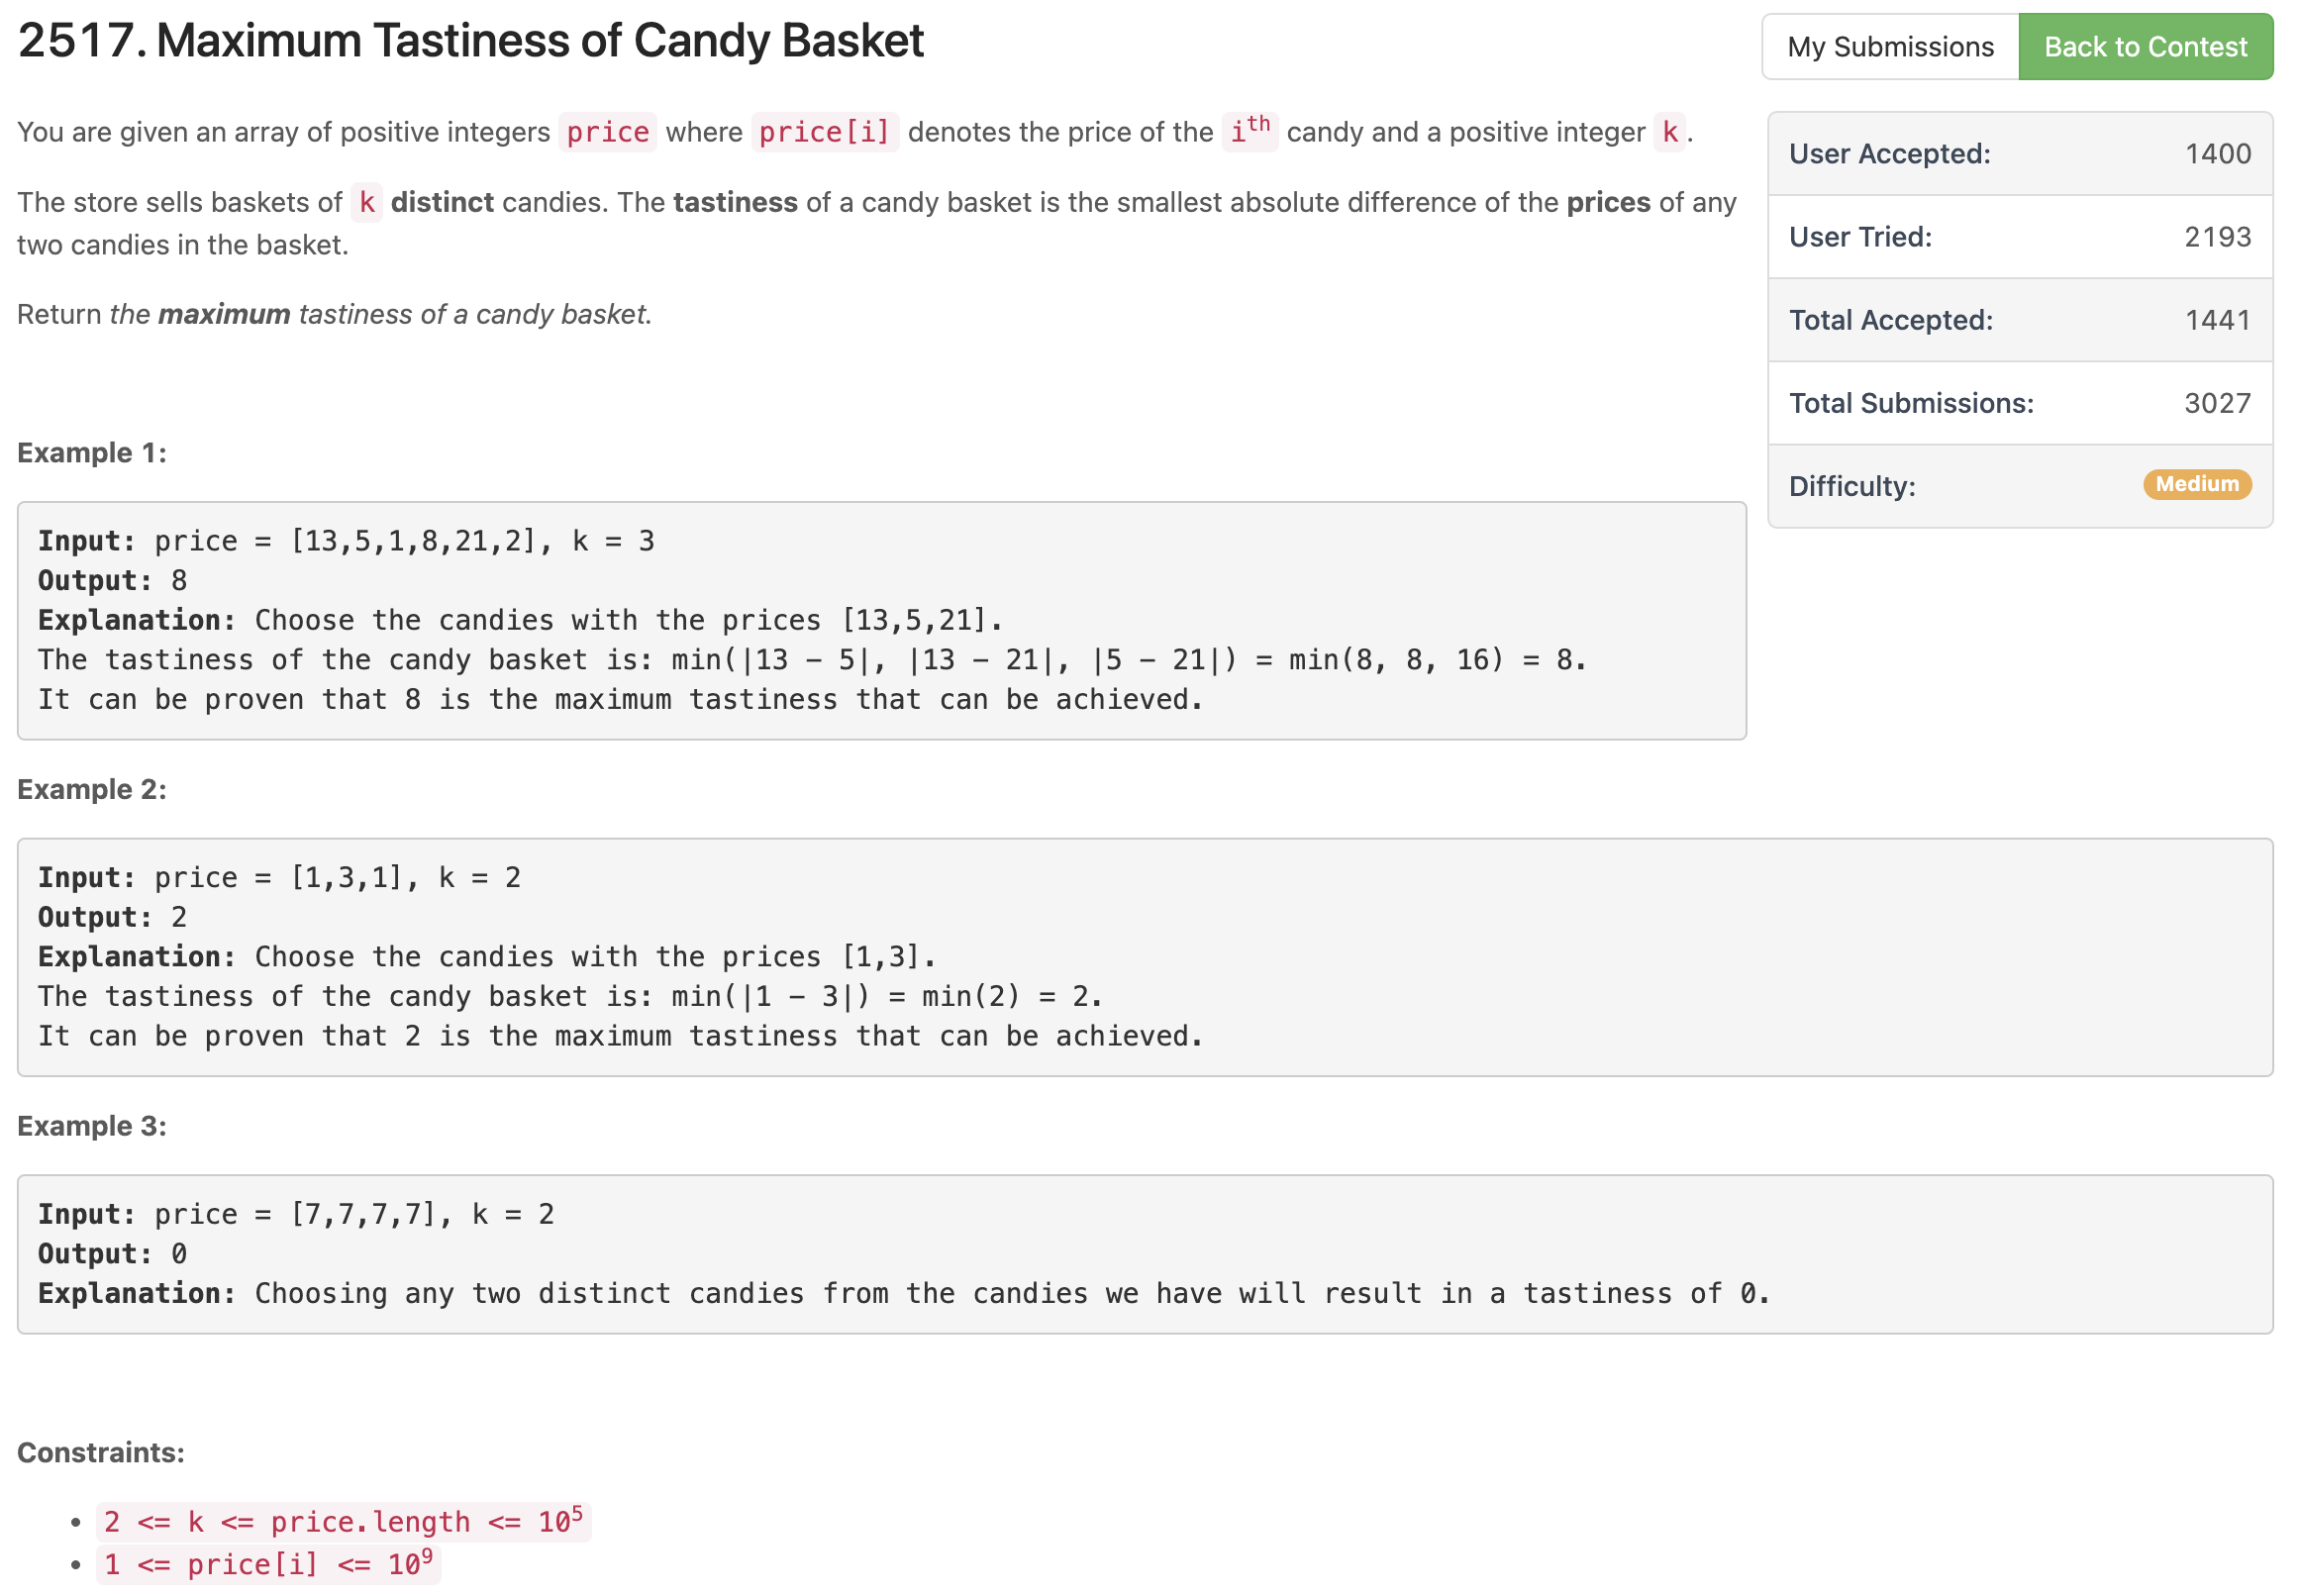

- 시간 초과 풀이

In [ ]:
from itertools import combinations
class Solution:
    def calculate_tastiness(self, arr: list) -> int:
        tmp = []
        for i in range(len(arr)-1):
            for j in range(i+1,len(arr)):
                if i != len(arr)-1:
                    tmp.append(abs(arr[i]-arr[j]))
        return min(tmp)
    def maximumTastiness(self, price: List[int], k: int) -> int:
        ans = []
        for each in combinations(price, k):
            ans.append(self.calculate_tastiness(list(each)))
        
        # print(ans)
        return(max(ans))    
        


- 이분탐색 풀이

In [ ]:
class Solution:
    def check_cnt(self,price,mid,k):
        cnt = 1
        next_number = price[0] + mid
        for i in range(1,len(price)):
            if price[i] >= next_number:
                cnt += 1
                next_number = price[i] + mid

        return cnt >= k
        

    def maximumTastiness(self, price: List[int], k: int) -> int:
        price.sort()
        left = 0
        right = max(price) - min(price)
        ans = 0
        while left <= right:
            mid = (left + right)//2
            # print(mid)
            if self.check_cnt(price,mid,k):
                left = mid+1
                ans = mid
            else:
                right = mid-1
            
        return ans